In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

### Loading the data

In [2]:
train_data=pd.read_csv('F:\\data_science\\forest_cover_dataset\\train.csv')
test_data=pd.read_csv('F:\\data_science\\forest_cover_dataset\\test.csv')
train_data.tail()

,Id,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
15115,15116,2607,243,23,258,7,660,170,251,214,...,0,0,0,0,0,0,0,0,0,3
15116,15117,2603,121,19,633,195,618,249,221,91,...,0,0,0,0,0,0,0,0,0,3
15117,15118,2492,134,25,365,117,335,250,220,83,...,0,0,0,0,0,0,0,0,0,3
15118,15119,2487,167,28,218,101,242,229,237,119,...,0,0,0,0,0,0,0,0,0,3
15119,15120,2475,197,34,319,78,270,189,244,164,...,0,0,0,0,0,0,0,0,0,3


In [3]:
print('shape of train data: '+str(train_data.shape))
print('shape of test data: '+str(test_data.shape))

shape of train data: (15120, 56)
shape of test data: (565892, 55)


In [4]:
train_data.isnull().any().sum()

0

In [5]:
test_data.isnull().any().sum()

0

In [6]:
train_data.columns

Index(['Id', 'Elevation', 'Aspect', 'Slope',
       'Horizontal_Distance_To_Hydrology', 'Vertical_Distance_To_Hydrology',
       'Horizontal_Distance_To_Roadways', 'Hillshade_9am', 'Hillshade_Noon',
       'Hillshade_3pm', 'Horizontal_Distance_To_Fire_Points',
       'Wilderness_Area1', 'Wilderness_Area2', 'Wilderness_Area3',
       'Wilderness_Area4', 'Soil_Type1', 'Soil_Type2', 'Soil_Type3',
       'Soil_Type4', 'Soil_Type5', 'Soil_Type6', 'Soil_Type7', 'Soil_Type8',
       'Soil_Type9', 'Soil_Type10', 'Soil_Type11', 'Soil_Type12',
       'Soil_Type13', 'Soil_Type14', 'Soil_Type15', 'Soil_Type16',
       'Soil_Type17', 'Soil_Type18', 'Soil_Type19', 'Soil_Type20',
       'Soil_Type21', 'Soil_Type22', 'Soil_Type23', 'Soil_Type24',
       'Soil_Type25', 'Soil_Type26', 'Soil_Type27', 'Soil_Type28',
       'Soil_Type29', 'Soil_Type30', 'Soil_Type31', 'Soil_Type32',
       'Soil_Type33', 'Soil_Type34', 'Soil_Type35', 'Soil_Type36',
       'Soil_Type37', 'Soil_Type38', 'Soil_Type39', 'Soil_

In [7]:
categorical_variables=[x for x in train_data.columns if (x[:-1]=='Soil_Type' or x[:-2]=='Soil_Type' or x[:-1]=='Wilderness_Area')]

In [8]:
train_data[categorical_variables].tail()

,Wilderness_Area1,Wilderness_Area2,Wilderness_Area3,Wilderness_Area4,Soil_Type1,Soil_Type2,Soil_Type3,Soil_Type4,Soil_Type5,Soil_Type6,...,Soil_Type31,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40
15115,0,0,1,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
15116,0,0,1,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
15117,0,0,1,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
15118,0,0,1,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
15119,0,0,1,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [9]:
numerical_variables=[x for x in train_data.columns if x not in categorical_variables and x not in ['Id','Cover_Type']]

In [10]:
train_data[numerical_variables].tail()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points
15115,2607,243,23,258,7,660,170,251,214,1282
15116,2603,121,19,633,195,618,249,221,91,1325
15117,2492,134,25,365,117,335,250,220,83,1187
15118,2487,167,28,218,101,242,229,237,119,932
15119,2475,197,34,319,78,270,189,244,164,914


In [11]:
wilderness_areas=[x for x in categorical_variables if x[:-1]=='Wilderness_Area']

In [12]:
soil_types=[x for x in categorical_variables if x not in wilderness_areas]

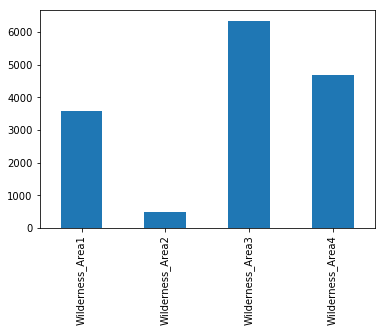

In [13]:
train_data[wilderness_areas].sum().plot(kind='bar');

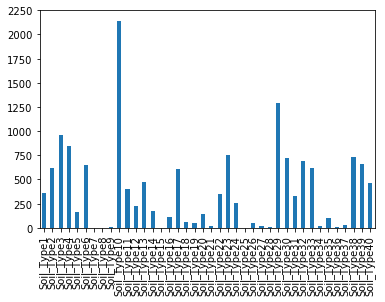

In [14]:
train_data[soil_types].sum().plot(kind='bar');

In [15]:
lst=[]
for i in soil_types:
    if train_data[i].sum()/15120<=0.005 or train_data[i].sum()/15120>=0.995:
        lst.append(i)
lst

['Soil_Type7',
 'Soil_Type8',
 'Soil_Type9',
 'Soil_Type15',
 'Soil_Type18',
 'Soil_Type19',
 'Soil_Type21',
 'Soil_Type25',
 'Soil_Type26',
 'Soil_Type27',
 'Soil_Type28',
 'Soil_Type34',
 'Soil_Type36',
 'Soil_Type37']

In [16]:
len(lst)

14

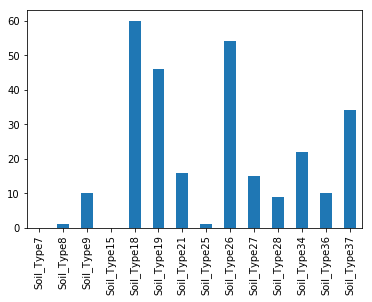

In [17]:
train_data[lst].sum().plot(kind='bar');

In [18]:
for i in lst:
    del train_data[i]
    del test_data[i]

In [19]:
categorical_variables=[x for x in train_data.columns if (x[:-1]=='Soil_Type' or x[:-2]=='Soil_Type' or x[:-1]=='Wilderness_Area')]
soil_types=[x for x in categorical_variables if x not in wilderness_areas]

In [20]:
train_data[train_data[soil_types].sum(axis=1)>1]

,Id,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,...,Soil_Type29,Soil_Type30,Soil_Type31,Soil_Type32,Soil_Type33,Soil_Type35,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type


In [21]:
train_data[train_data[wilderness_areas].sum(axis=1)>1]

,Id,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,...,Soil_Type29,Soil_Type30,Soil_Type31,Soil_Type32,Soil_Type33,Soil_Type35,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type


In [22]:
len(soil_types)

26

In [23]:
test_data[test_data[soil_types].sum(axis=1)>1]

,Id,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,...,Soil_Type24,Soil_Type29,Soil_Type30,Soil_Type31,Soil_Type32,Soil_Type33,Soil_Type35,Soil_Type38,Soil_Type39,Soil_Type40


In [24]:
test_data[test_data[wilderness_areas].sum(axis=1)>1]

,Id,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,...,Soil_Type24,Soil_Type29,Soil_Type30,Soil_Type31,Soil_Type32,Soil_Type33,Soil_Type35,Soil_Type38,Soil_Type39,Soil_Type40


In [25]:
lst=[]
for _,row in train_data[soil_types].iterrows():
    for j in range(len(row)):
        if row[j]==1:
            lst.append(j+1)
            break
    else:
        lst.append(0)

In [26]:
lst2=[]
for _,row in test_data[soil_types].iterrows():
    for j in range(len(row)):
        if row[j]==1:
            lst2.append(j+1)
            break
    else:
        lst2.append(0)

In [27]:
train_data['Soil_Types']=lst

In [28]:
test_data['Soil_Types']=lst2

In [29]:
train_data.head()

,Id,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,...,Soil_Type30,Soil_Type31,Soil_Type32,Soil_Type33,Soil_Type35,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type,Soil_Types
0,1,2596,51,3,258,0,510,221,232,148,...,0,0,0,0,0,0,0,0,5,18
1,2,2590,56,2,212,-6,390,220,235,151,...,0,0,0,0,0,0,0,0,5,18
2,3,2804,139,9,268,65,3180,234,238,135,...,0,0,0,0,0,0,0,0,2,9
3,4,2785,155,18,242,118,3090,238,238,122,...,1,0,0,0,0,0,0,0,2,19
4,5,2595,45,2,153,-1,391,220,234,150,...,0,0,0,0,0,0,0,0,5,18


In [30]:
for i in soil_types:
    del train_data[i]
    del test_data[i]

In [31]:
lst=[]
for _,row in train_data[wilderness_areas].iterrows():
    for j in range(len(row)):
        if row[j]==1:
            lst.append(j+1)
            break
    else:
        lst.append(0)
len(lst)

15120

In [32]:
lst2=[]
for _,row in test_data[wilderness_areas].iterrows():
    for j in range(len(row)):
        if row[j]==1:
            lst2.append(j+1)
            break
    else:
        lst2.append(0)
len(lst2)

565892

In [33]:
train_data['Wilderness_Areas']=lst
test_data['Wilderness_Areas']=lst2

In [34]:
for i in wilderness_areas:
    del train_data[i]
    del test_data[i]

In [35]:
train_data.tail()

,Id,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,Cover_Type,Soil_Types,Wilderness_Areas
15115,15116,2607,243,23,258,7,660,170,251,214,1282,3,4,3
15116,15117,2603,121,19,633,195,618,249,221,91,1325,3,4,3
15117,15118,2492,134,25,365,117,335,250,220,83,1187,3,4,3
15118,15119,2487,167,28,218,101,242,229,237,119,932,3,4,3
15119,15120,2475,197,34,319,78,270,189,244,164,914,3,2,3


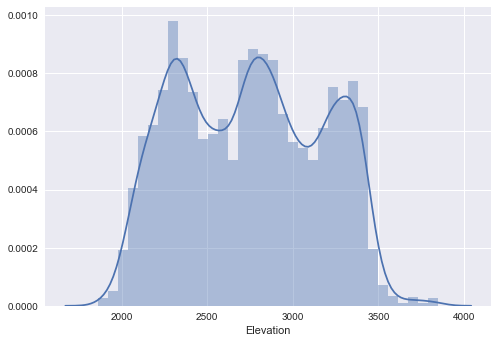

In [36]:
import seaborn as sns
sns.distplot(train_data['Elevation']);

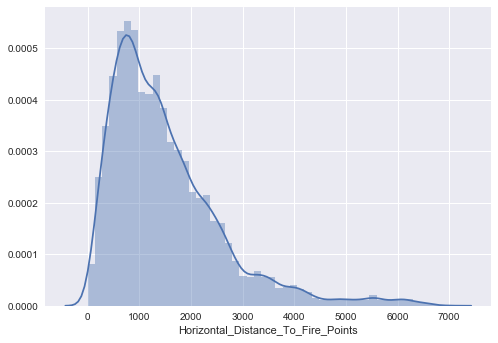

In [37]:
sns.distplot(train_data['Horizontal_Distance_To_Fire_Points']);

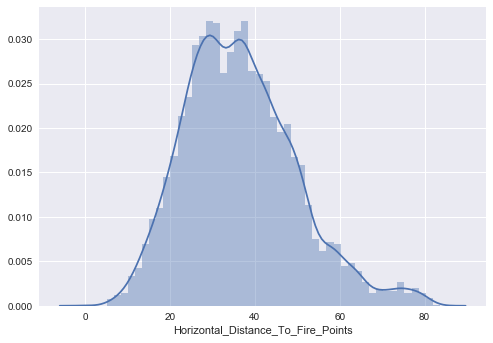

In [38]:
sns.distplot(np.sqrt(train_data['Horizontal_Distance_To_Fire_Points']));

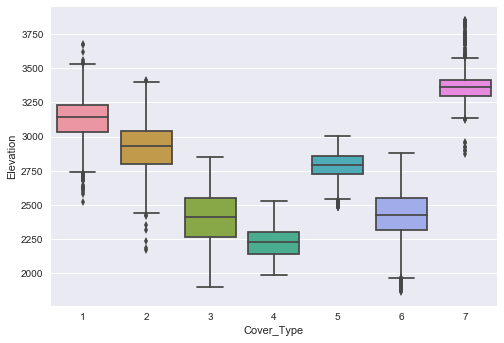

In [39]:
sns.boxplot(x='Cover_Type',y='Elevation',data=train_data)


In [40]:
lst=np.sqrt(train_data['Horizontal_Distance_To_Fire_Points'])
del train_data['Horizontal_Distance_To_Fire_Points']
train_data['Horizontal_Distance_To_Fire_Points_transformed']=lst
lst2=np.sqrt(test_data['Horizontal_Distance_To_Fire_Points'])
del test_data['Horizontal_Distance_To_Fire_Points']
test_data['Horizontal_Distance_To_Fire_Points_transformed']=lst2

In [41]:
len(train_data[train_data['Vertical_Distance_To_Hydrology']<0])

1139

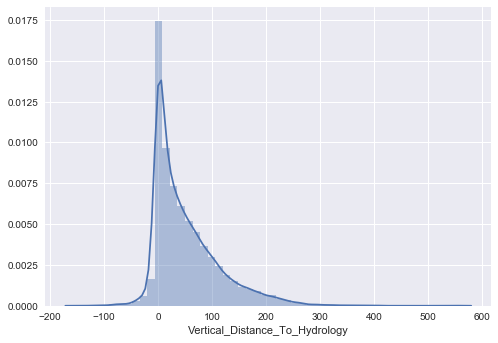

In [42]:
sns.distplot(train_data['Vertical_Distance_To_Hydrology']);

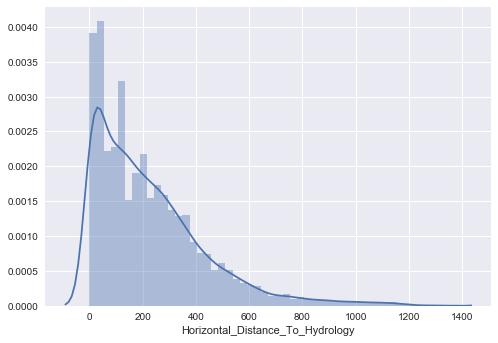

In [43]:
sns.distplot(train_data['Horizontal_Distance_To_Hydrology']);

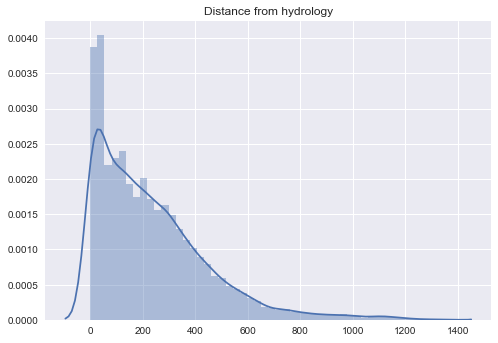

In [44]:
a=np.array(train_data['Horizontal_Distance_To_Hydrology'])
b=np.array(train_data['Vertical_Distance_To_Hydrology'])
lst=np.sqrt(a**2+b**2)
sns.distplot(lst);
plt.title('Distance from hydrology');

In [45]:
train_data['Distance_from_hydrology']=lst

In [46]:
a=np.array(test_data['Horizontal_Distance_To_Hydrology'])
b=np.array(test_data['Vertical_Distance_To_Hydrology'])
lst=np.sqrt(a**2+b**2)
test_data['Distance_from_hydrology']=lst

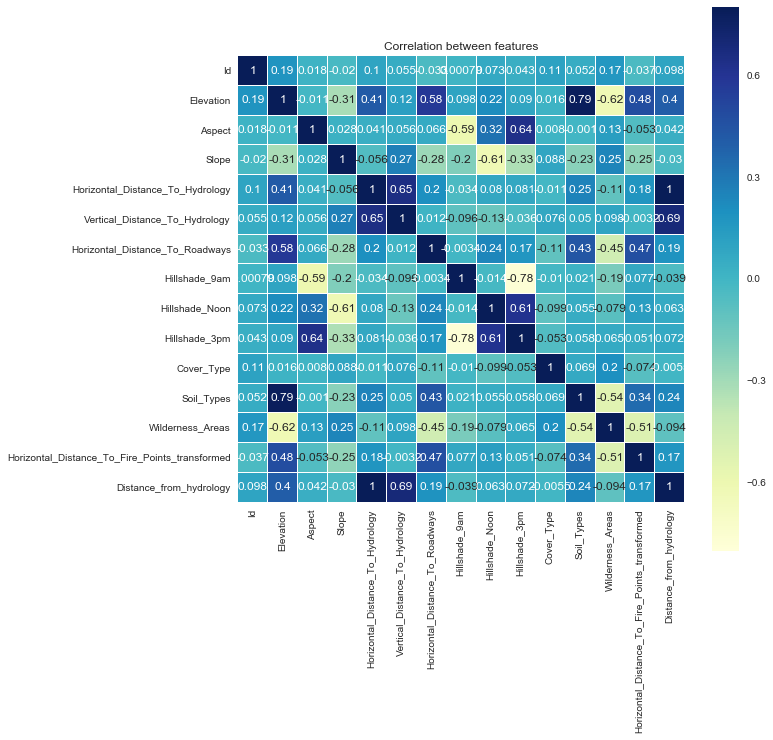

In [47]:
corr=train_data.corr()#["Survived"]
plt.figure(figsize=(10, 10))

sns.heatmap(corr, vmax=.8, linewidths=0.01,
            square=True,annot=True,cmap='YlGnBu',linecolor="white")
plt.title('Correlation between features');

In [48]:
del train_data['Horizontal_Distance_To_Hydrology']

In [49]:
del test_data['Horizontal_Distance_To_Hydrology']

In [50]:
test_data.tail()

,Id,Elevation,Aspect,Slope,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Soil_Types,Wilderness_Areas,Horizontal_Distance_To_Fire_Points_transformed,Distance_from_hydrology
565887,581008,2396,153,20,17,108,240,237,118,2,3,28.930952,86.683332
565888,581009,2391,152,19,12,95,240,237,119,2,3,29.068884,68.066144
565889,581010,2386,159,17,7,90,236,241,130,2,3,29.223278,60.406953
565890,581011,2384,170,15,5,90,230,245,143,2,3,29.393877,60.207973
565891,581012,2383,165,13,4,67,231,244,141,2,3,29.580399,60.133186


In [51]:
train_data.tail()

,Id,Elevation,Aspect,Slope,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Cover_Type,Soil_Types,Wilderness_Areas,Horizontal_Distance_To_Fire_Points_transformed,Distance_from_hydrology
15115,15116,2607,243,23,7,660,170,251,214,3,4,3,35.805028,258.094944
15116,15117,2603,121,19,195,618,249,221,91,3,4,3,36.400549,662.354890
15117,15118,2492,134,25,117,335,250,220,83,3,4,3,34.452866,383.293621
15118,15119,2487,167,28,101,242,229,237,119,3,4,3,30.528675,240.260276
15119,15120,2475,197,34,78,270,189,244,164,3,2,3,30.232433,328.397625


In [52]:
independent_variables=[x for x in test_data.columns if x not in ['Id']]

In [53]:
len(independent_variables)

12

In [54]:
from sklearn.model_selection import train_test_split

In [55]:
X_train,X_test,y_train,y_test=train_test_split(train_data[independent_variables],train_data['Cover_Type'],test_size=0.25,random_state=1)

In [56]:
from sklearn.model_selection import cross_val_score

### Logistic Regression

In [86]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train_scaled= scaler.fit_transform(X_train)
X_test_scaled= scaler.transform(X_test)

In [58]:
from sklearn.linear_model import LogisticRegression

In [59]:
C=[0.001,0.01,0.1,1,10,100]
scores=[]
for c in C:
    lr=LogisticRegression(C=c)
    scores.append(float('%0.4f'%(cross_val_score(lr,X_train_scaled,y_train,cv=5).mean())))

print("Scores obtained: ")
print(scores)
max_score=max(scores)
print('\n')
print('Maximum score is '+str(max_score)+' at C='+str(C[scores.index(max_score)]))

Scores obtained: 
[0.3654, 0.4943, 0.5551, 0.5978, 0.6101, 0.6145]


Maximum score is 0.6145 at C=100


In [60]:
lr=LogisticRegression(C=1000)
cross_val_score(lr,X_train_scaled,y_train,cv=5).mean()

0.61463895081026654

In [61]:
lr=LogisticRegression(C=10000)
cross_val_score(lr,X_train_scaled,y_train,cv=5).mean()

0.61437424471069435

In [62]:
lr=LogisticRegression(C=100)
lr.fit(X_train_scaled,y_train)
lr.score(X_test_scaled,y_test)

0.61402116402116402

### Random Forest Classifier

In [57]:
from sklearn.ensemble import RandomForestClassifier

In [58]:
rf=RandomForestClassifier(n_estimators=100,max_features='sqrt',random_state=0)
rf.fit(X_train,y_train)
rf.score(X_test,y_test)

0.86137566137566135

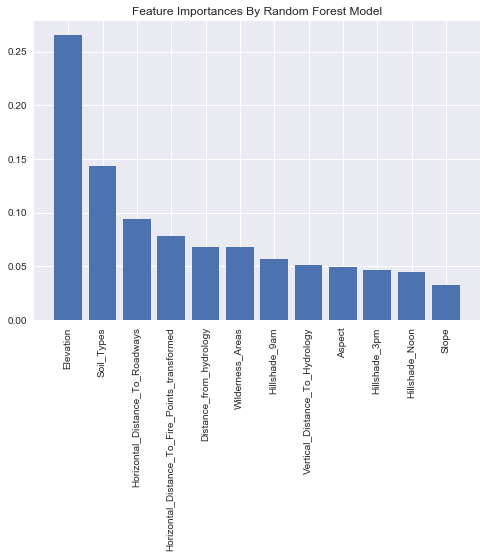

In [59]:
importances=rf.feature_importances_
std = np.std([rf.feature_importances_ for tree in rf.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]
sorted_important_features=[]
predictors=X_train.columns
for i in indices:
    sorted_important_features.append(predictors[i])

plt.figure()
plt.title("Feature Importances By Random Forest Model")
plt.bar(range(np.size(predictors)), importances[indices],
        yerr=std[indices], align="center")
plt.xticks(range(np.size(predictors)), sorted_important_features, rotation='vertical')

plt.xlim([-1, np.size(predictors)]);

### Support Vector Machines

In [66]:
from sklearn.svm import SVC

In [67]:
kernels=['rbf','linear','poly']
C=[0.001,0.01,0.1,1,10,100]
temp_score=0
for c in C:
    for kernel in kernels:
        svm=SVC(C=c,kernel=kernel)
        a=(float('%0.5f'%(cross_val_score(svm,X_train_scaled,y_train,cv=5).mean())))
        if a>temp_score:
            temp_score=a
            C_1=c
            kernel_1=kernel

print("Maximum score(accuracy) obtained is:"+str(temp_score))
print("It is obtained at "+kernel_1+" kernel and at C="+str(C_1))

Maximum score(accuracy) obtained is:0.73149
It is obtained at rbf kernel and at C=100


In [68]:
svm=SVC(C=1000,kernel='rbf')
cross_val_score(svm,X_train_scaled,y_train).mean()

0.75300005594060992

In [69]:
svm.fit(X_train_scaled,y_train)
svm.score(X_test_scaled,y_test)

0.75740740740740742

### Adaptive Boosting

In [70]:
from sklearn.ensemble import AdaBoostClassifier

In [71]:
learning_rates=[0.01,0.1,1,10]
n_estimators=[50,100]
temp_score=0
scores=[]
for n in n_estimators:
    for lr in learning_rates:
        adam=AdaBoostClassifier(learning_rate=lr,n_estimators=n,random_state=0)
        score=(float('%0.5f'%(cross_val_score(adam,X_train,y_train,cv=5).mean())))
        scores.append(score)
        if score>temp_score:
            temp_score=score
            lr_1=lr
            n_1=n
    
print("Maximum score(accuracy) obtained is:"+str(temp_score))
print("It is obtained at learning rate="+str(lr_1)+" and n_estimators="+str(n_1))

Maximum score(accuracy) obtained is:0.43607
It is obtained at learning rate=0.01 and n_estimators=50


In [72]:
scores

[0.43607, 0.35229, 0.38115, 0.17143, 0.33616, 0.37715, 0.38115, 0.2102]

In [73]:
adam=AdaBoostClassifier(learning_rate=0.01,n_estimators=50)
adam.fit(X_train,y_train)
adam.score(X_test,y_test)

0.43148148148148147

### Gradient Boost Classifier

In [74]:
from sklearn.ensemble import GradientBoostingClassifier

In [75]:
GradientBoostingClassifier?

In [76]:
gram=GradientBoostingClassifier()
gram.fit(X_train,y_train)
gram.score(X_test,y_test)

0.79391534391534391

### Predictions for test data

In [80]:
svm=SVC(C=1000,kernel='rbf')
svm.fit(X_train_scaled,y_train)

SVC(C=1000, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [81]:
scaled_test=scaler.transform(test_data[independent_variables])

In [82]:
test_predictions=svm.predict(scaled_test)

In [83]:
Id=np.array(test_data['Id'])

In [84]:
submission=pd.DataFrame({
    'Id':Id,
    'Cover_Type': test_predictions
})
submission.to_csv('forest_cover_submission.csv', index=False)